## Подготовка

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import matplotlib as mpl
from matplotlib import pyplot
from pandas import DataFrame

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.regularizers import l2
import tensorflow as tf
from keras.layers import Conv1D, Bidirectional, TimeDistributed
from keras.layers import MaxPooling1D, Flatten
from keras.regularizers import L1, L2

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from sklearn.dummy import DummyRegressor

#import time
import warnings
warnings.filterwarnings('ignore')

In [30]:
varload = True
while (varload == True):
    try:
        data = pd.read_csv('C:\\Python\\APPLE\\APLE_PERIOD_D1.csv',index_col=[0], parse_dates=[0])
        varload = False
    except PermissionError:
        varload = True


In [31]:
#-перевернуть-датафрейм-
data = data.iloc[::-1]
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A30,A31,A32,A33,A34,A35,A36,A37,A38,Close
data,,,,,,,,,,,,,,,,,,,,,
2017-11-30,0.035,-0.015,0.0875,0.0075,-0.0175,-0.0375,0.0875,0.0075,1.000000e-02,7.105427e-15,...,-0.06,0.000050,-0.029931,0.000000,0.000000,0.03,0.03,3.552714e-15,-0.037431,1
2017-12-01,-0.015,-0.045,0.0075,0.0225,-0.0375,-0.1125,0.0075,0.0225,7.105427e-15,-6.000000e-02,...,-0.15,-0.029931,0.000069,0.000000,0.000000,0.00,0.00,1.500000e-01,-0.022431,0
2017-12-04,-0.045,0.060,0.0225,0.1500,-0.1125,-0.0300,0.0225,0.1500,-6.000000e-02,7.500000e-02,...,-0.03,0.000069,-0.029912,0.000000,0.000000,0.03,0.03,3.750000e-02,-0.179912,1
2017-12-05,0.060,-0.060,0.1500,0.0300,-0.0300,-0.1500,0.1500,0.0300,7.500000e-02,-7.500000e-02,...,-0.09,-0.029912,0.000088,0.000000,0.000000,0.00,0.00,1.875000e-01,-0.029912,0
2017-12-06,-0.060,0.045,0.0300,0.1125,-0.1500,-0.0225,0.0300,0.1125,-7.500000e-02,4.500000e-02,...,0.00,0.000088,0.000088,0.000000,0.000000,0.00,0.00,2.250000e-02,-0.112412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.075,0.165,0.1875,0.4125,-0.0375,-0.0825,0.3250,0.2375,1.350000e-01,1.100000e-01,...,-0.24,0.026316,0.056391,0.094411,0.014286,-0.09,0.32,6.928571e-02,-0.356109,0
2024-03-18,0.165,0.070,0.4125,0.1750,-0.0825,-0.0350,0.2375,0.1500,1.100000e-01,6.500000e-02,...,-0.12,0.056391,-0.033477,0.014286,-0.085777,0.02,0.31,-5.327694e-02,-0.208477,1
2024-03-19,0.070,-0.095,0.1750,0.0475,-0.0350,-0.2375,0.1500,0.0725,6.500000e-02,-5.000000e-02,...,-0.31,-0.033477,-0.183252,-0.085777,-0.145802,0.27,0.40,-2.080201e-02,-0.230752,1


In [32]:
display(data.head(20))

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A30,A31,A32,A33,A34,A35,A36,A37,A38,Close
data,,,,,,,,,,,,,,,,,,,,,
2017-11-30,3.500000e-02,-1.500000e-02,8.750000e-02,7.500000e-03,-1.750000e-02,-3.750000e-02,8.750000e-02,7.500000e-03,1.000000e-02,7.105427e-15,...,-0.06,0.000050,-0.029931,0.0,0.0,0.03,0.03,3.552714e-15,-0.037431,1
2017-12-01,-1.500000e-02,-4.500000e-02,7.500000e-03,2.250000e-02,-3.750000e-02,-1.125000e-01,7.500000e-03,2.250000e-02,7.105427e-15,-6.000000e-02,...,-0.15,-0.029931,0.000069,0.0,0.0,0.00,0.00,1.500000e-01,-0.022431,0
2017-12-04,-4.500000e-02,6.000000e-02,2.250000e-02,1.500000e-01,-1.125000e-01,-3.000000e-02,2.250000e-02,1.500000e-01,-6.000000e-02,7.500000e-02,...,-0.03,0.000069,-0.029912,0.0,0.0,0.03,0.03,3.750000e-02,-0.179912,1
2017-12-05,6.000000e-02,-6.000000e-02,1.500000e-01,3.000000e-02,-3.000000e-02,-1.500000e-01,1.500000e-01,3.000000e-02,7.500000e-02,-7.500000e-02,...,-0.09,-0.029912,0.000088,0.0,0.0,0.00,0.00,1.875000e-01,-0.029912,0
2017-12-06,-6.000000e-02,4.500000e-02,3.000000e-02,1.125000e-01,-1.500000e-01,-2.250000e-02,3.000000e-02,1.125000e-01,-7.500000e-02,4.500000e-02,...,0.00,0.000088,0.000088,0.0,0.0,0.00,0.00,2.250000e-02,-0.112412,1
2017-12-07,4.500000e-02,-3.500000e-02,1.125000e-01,1.750000e-02,-2.250000e-02,-8.750000e-02,1.125000e-01,1.750000e-02,4.500000e-02,-3.500000e-02,...,-0.07,0.000088,0.000088,0.0,0.0,0.00,0.00,8.750000e-02,-0.017412,1
2017-12-08,-3.500000e-02,-1.100000e-01,1.750000e-02,5.500000e-02,-8.750000e-02,-2.750000e-01,1.750000e-02,5.500000e-02,-3.500000e-02,-1.100000e-01,...,-0.29,0.000088,0.000088,0.0,0.0,0.00,0.00,2.750000e-01,-0.054912,1
2017-12-11,-1.100000e-01,-3.000000e-02,5.500000e-02,1.500000e-02,-2.750000e-01,-7.500000e-02,5.500000e-02,1.500000e-02,-1.100000e-01,-2.500000e-02,...,-0.35,0.000088,-0.009906,0.0,0.0,0.01,0.01,6.250000e-02,-0.024906,0
2017-12-12,-3.000000e-02,9.000000e-02,1.500000e-02,2.250000e-01,-7.500000e-02,-4.500000e-02,1.500000e-02,2.250000e-01,-2.500000e-02,8.500000e-02,...,0.00,-0.009906,0.000094,0.0,0.0,0.00,0.00,4.250000e-02,-0.224906,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1586 entries, 2017-11-30 to 2024-03-21
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1586 non-null   float64
 1   A2      1586 non-null   float64
 2   A3      1586 non-null   float64
 3   A4      1586 non-null   float64
 4   A5      1586 non-null   float64
 5   A6      1586 non-null   float64
 6   A7      1586 non-null   float64
 7   A8      1586 non-null   float64
 8   A9      1586 non-null   float64
 9   A10     1586 non-null   float64
 10  A11     1586 non-null   float64
 11  A12     1586 non-null   float64
 12  A13     1586 non-null   float64
 13  A14     1586 non-null   float64
 14  A15     1586 non-null   float64
 15  A16     1586 non-null   float64
 16  A17     1586 non-null   float64
 17  A18     1586 non-null   float64
 18  A19     1586 non-null   float64
 19  A20     1586 non-null   float64
 20  A21     1586 non-null   float64
 21  A22     1586 non-nu

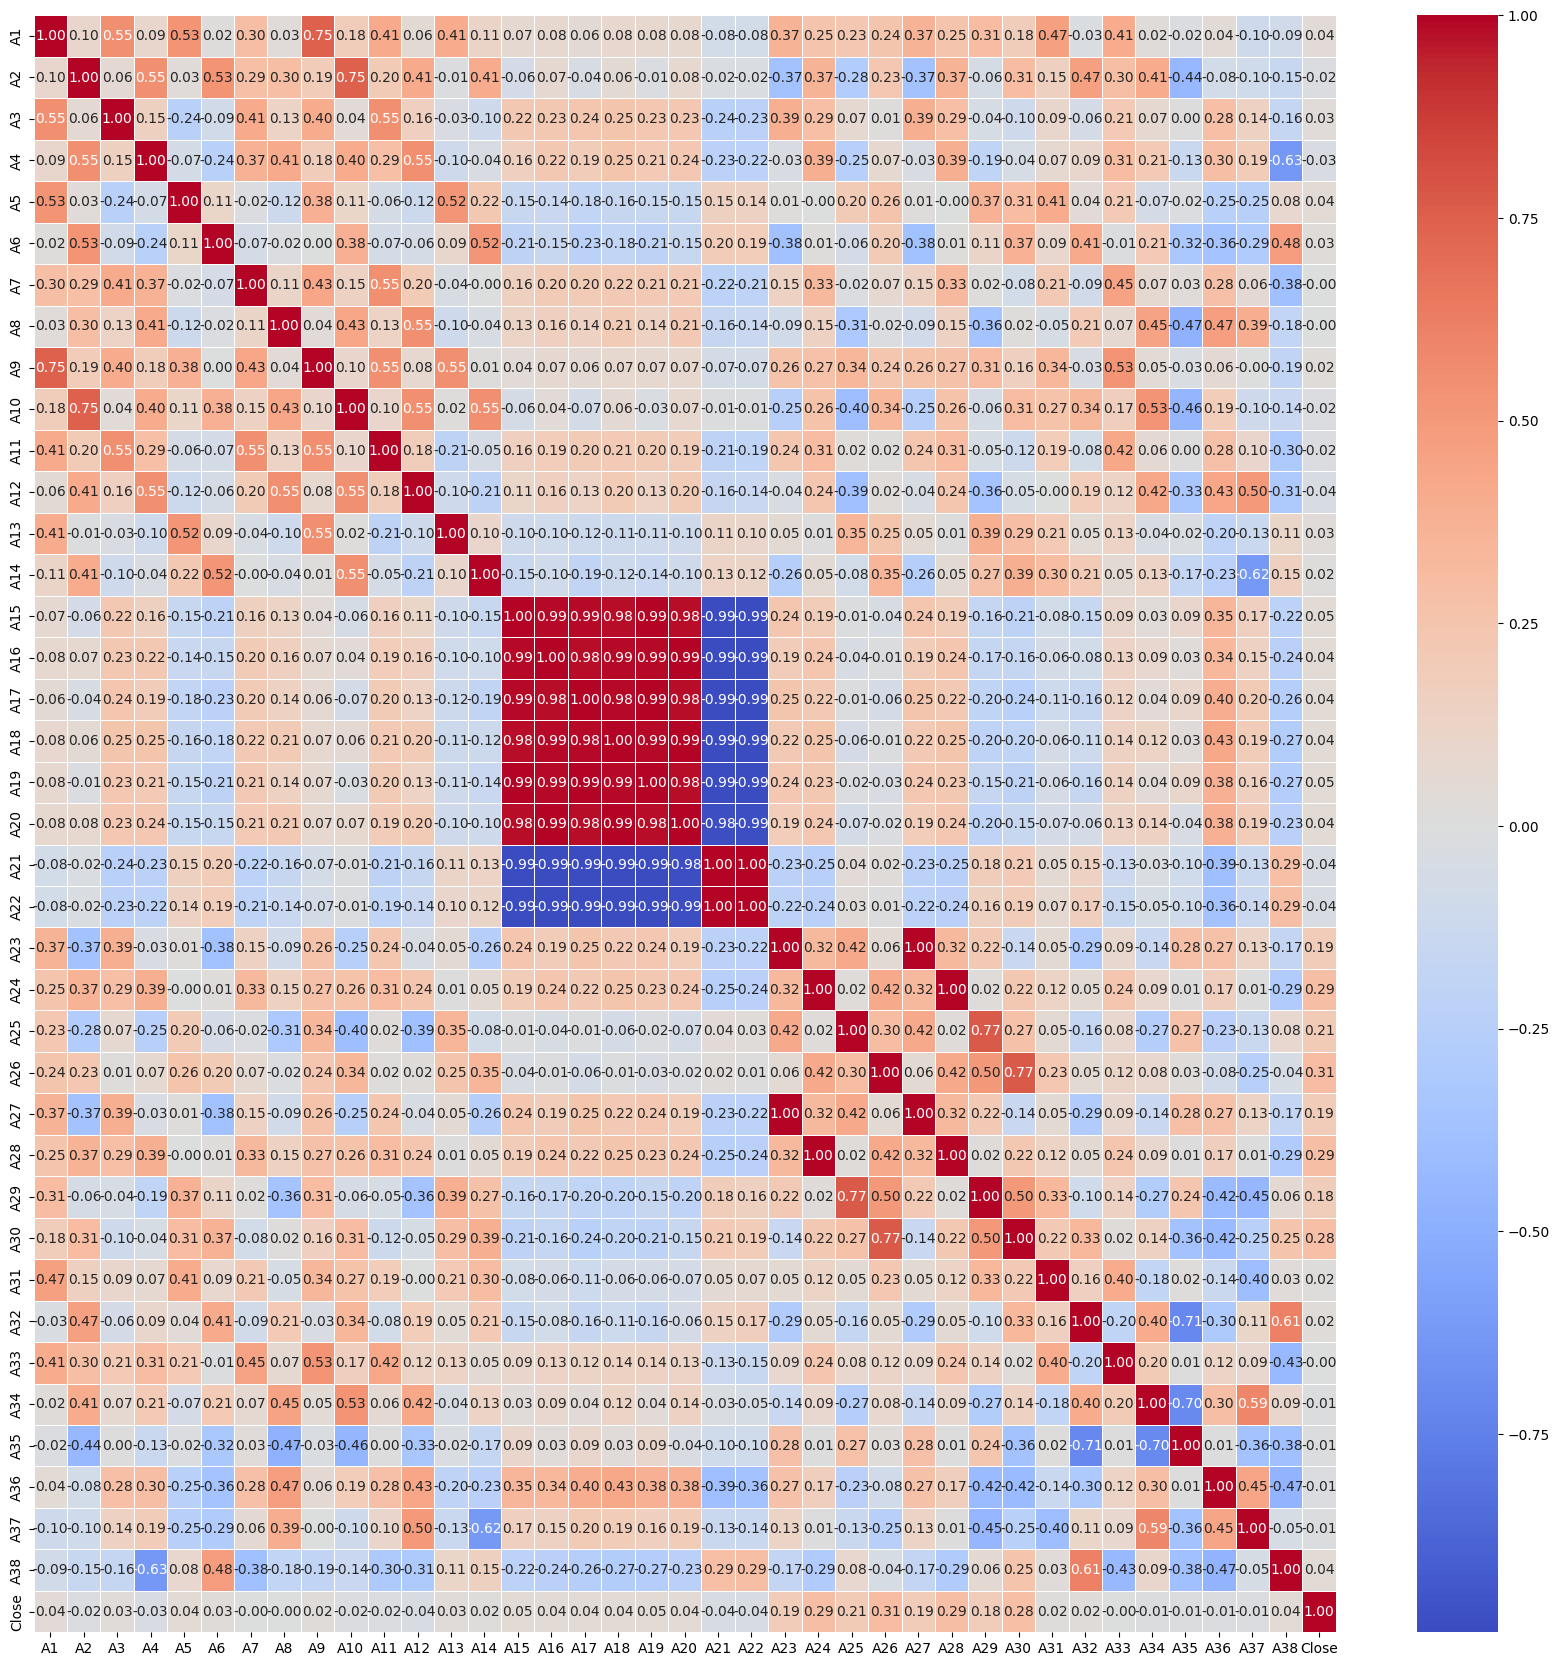

In [34]:
corr_matrix = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(21,21))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Анализ

In [35]:
print('-Начальная дата-',data.index.min())
print('-Конечная дата-',data.index.max())
print('-Общее время-',data.index.max() - data.index.min())

-Начальная дата- 2017-11-30 00:00:00
-Конечная дата- 2024-03-21 00:00:00
-Общее время- 2303 days 00:00:00


In [36]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A30,A31,A32,A33,A34,A35,A36,A37,A38,Close
count,1.586000e+03,1.586000e+03,1586.000000,1586.000000,1586.000000,1586.000000,1.586000e+03,1.586000e+03,1.586000e+03,1.586000e+03,...,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,9.110971e-04,8.858764e-04,0.137741,0.137688,-0.135919,-0.135916,1.553373e-01,1.552837e-01,9.489281e-04,9.583859e-04,...,-0.453979,-0.098111,-0.098094,0.101083,0.101016,-0.006179,0.365038,0.242444,-0.235782,0.499369
std,1.351870e-01,1.351844e-01,0.199227,0.199252,0.204046,0.204048,2.210981e-01,2.211249e-01,1.373363e-01,1.373374e-01,...,0.423450,0.176091,0.176102,0.182770,0.182826,0.245459,0.214390,0.255977,0.262742,0.500157
min,-1.085000e+00,-1.085000e+00,0.000000,0.000000,-2.712500,-2.712500,3.552714e-15,3.552714e-15,-1.015000e+00,-1.015000e+00,...,-4.560000,-1.807212,-1.807212,-0.184173,-0.184173,-0.980000,0.000000,-0.161234,-2.838559,0.000000
25%,-6.500000e-02,-6.500000e-02,0.025000,0.025000,-0.175000,-0.175000,3.000000e-02,3.000000e-02,-6.500000e-02,-6.500000e-02,...,-0.590000,-0.164821,-0.164821,-0.010829,-0.011062,-0.130000,0.220000,0.086613,-0.312594,0.000000
50%,3.197442e-14,3.108624e-14,0.062500,0.062500,-0.062500,-0.062500,7.750000e-02,7.750000e-02,7.105427e-15,7.105427e-15,...,-0.360000,-0.059903,-0.059903,0.061466,0.061466,-0.005000,0.320000,0.185291,-0.170965,0.000000
75%,6.500000e-02,6.500000e-02,0.175000,0.175000,-0.025000,-0.025000,2.000000e-01,2.000000e-01,6.500000e-02,6.500000e-02,...,-0.190000,0.005966,0.006128,0.175807,0.175807,0.120000,0.450000,0.326164,-0.077058,1.000000
max,1.035000e+00,1.035000e+00,2.587500,2.587500,0.000000,0.000000,2.750000e+00,2.750000e+00,1.055000e+00,1.055000e+00,...,0.000000,0.173565,0.173565,1.701466,1.701466,1.210000,2.160000,2.487757,0.158565,1.000000


## Обучение

In [37]:
 varload = True
while (varload == True):
    try:
        data = pd.read_csv('C:\\Python\\APPLE\\APLE_PERIOD_D1.csv',index_col=[0], parse_dates=[0])
        varload = False
    except PermissionError:
        varload = True

In [38]:
#-перевернуть-датафрейм-
data = data.iloc[::-1]
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A30,A31,A32,A33,A34,A35,A36,A37,A38,Close
data,,,,,,,,,,,,,,,,,,,,,
2017-11-30,0.035,-0.015,0.0875,0.0075,-0.0175,-0.0375,0.0875,0.0075,1.000000e-02,7.105427e-15,...,-0.06,0.000050,-0.029931,0.000000,0.000000,0.03,0.03,3.552714e-15,-0.037431,1
2017-12-01,-0.015,-0.045,0.0075,0.0225,-0.0375,-0.1125,0.0075,0.0225,7.105427e-15,-6.000000e-02,...,-0.15,-0.029931,0.000069,0.000000,0.000000,0.00,0.00,1.500000e-01,-0.022431,0
2017-12-04,-0.045,0.060,0.0225,0.1500,-0.1125,-0.0300,0.0225,0.1500,-6.000000e-02,7.500000e-02,...,-0.03,0.000069,-0.029912,0.000000,0.000000,0.03,0.03,3.750000e-02,-0.179912,1
2017-12-05,0.060,-0.060,0.1500,0.0300,-0.0300,-0.1500,0.1500,0.0300,7.500000e-02,-7.500000e-02,...,-0.09,-0.029912,0.000088,0.000000,0.000000,0.00,0.00,1.875000e-01,-0.029912,0
2017-12-06,-0.060,0.045,0.0300,0.1125,-0.1500,-0.0225,0.0300,0.1125,-7.500000e-02,4.500000e-02,...,0.00,0.000088,0.000088,0.000000,0.000000,0.00,0.00,2.250000e-02,-0.112412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.075,0.165,0.1875,0.4125,-0.0375,-0.0825,0.3250,0.2375,1.350000e-01,1.100000e-01,...,-0.24,0.026316,0.056391,0.094411,0.014286,-0.09,0.32,6.928571e-02,-0.356109,0
2024-03-18,0.165,0.070,0.4125,0.1750,-0.0825,-0.0350,0.2375,0.1500,1.100000e-01,6.500000e-02,...,-0.12,0.056391,-0.033477,0.014286,-0.085777,0.02,0.31,-5.327694e-02,-0.208477,1
2024-03-19,0.070,-0.095,0.1750,0.0475,-0.0350,-0.2375,0.1500,0.0725,6.500000e-02,-5.000000e-02,...,-0.31,-0.033477,-0.183252,-0.085777,-0.145802,0.27,0.40,-2.080201e-02,-0.230752,1


In [39]:
data = data.dropna()

In [40]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

features_train  = train.drop('Close', axis=1)
target_train = train[['Close']]
features_test = test.drop('Close', axis=1)
target_test = test[['Close']]

In [41]:
features_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38
data,,,,,,,,,,,,,,,,,,,,,
2023-08-04,0.125,0.165,0.3125,0.4125,-0.0625,-0.0825,0.3625,0.3750,0.085,0.235,...,-0.56,-0.26,0.069217,0.159217,0.040081,0.269806,-0.18,0.44,0.387306,-0.253283
2023-08-07,0.165,-0.270,0.4125,0.1350,-0.0825,-0.6750,0.3750,0.0775,0.235,-0.185,...,-0.26,-0.57,0.159217,-0.360457,0.269806,-0.080251,0.11,0.61,0.382249,-0.495457
2023-08-08,-0.270,0.060,0.1350,0.1500,-0.6750,-0.0300,0.0775,0.0575,-0.185,-0.015,...,-0.57,-0.40,-0.360457,-0.180244,-0.080251,-0.050326,0.28,0.46,-0.012826,-0.330244
2023-08-09,0.060,0.045,0.1500,0.1125,-0.0300,-0.0225,0.0575,0.1500,-0.015,-0.030,...,-0.40,-0.28,-0.180244,0.059818,-0.050326,0.039543,0.01,0.31,0.114543,-0.052682
2023-08-10,0.045,-0.090,0.1125,0.0450,-0.0225,-0.2250,0.1500,0.0475,-0.030,-0.095,...,-0.28,-0.47,0.059818,-0.050050,0.039543,-0.080514,0.13,0.30,0.156986,-0.095050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.075,0.165,0.1875,0.4125,-0.0375,-0.0825,0.3250,0.2375,0.135,0.110,...,-0.43,-0.24,0.026316,0.056391,0.094411,0.014286,-0.09,0.32,0.069286,-0.356109
2024-03-18,0.165,0.070,0.4125,0.1750,-0.0825,-0.0350,0.2375,0.1500,0.110,0.065,...,-0.24,-0.12,0.056391,-0.033477,0.014286,-0.085777,0.02,0.31,-0.053277,-0.208477
2024-03-19,0.070,-0.095,0.1750,0.0475,-0.0350,-0.2375,0.1500,0.0725,0.065,-0.050,...,-0.12,-0.31,-0.033477,-0.183252,-0.085777,-0.145802,0.27,0.40,-0.020802,-0.230752


In [42]:
features_train0 = features_train.copy()
features_test0 = features_test.copy()

In [43]:
num_cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','A21','A22','A23','A24','A25','A26','A27','A28','A29','A30','A31','A32','A33','A34','A35','A36','A37','A38']
scaler = MinMaxScaler(feature_range=(0,1))
features_train[num_cols] = scaler.fit_transform(features_train[num_cols])
features_test[num_cols] = scaler.transform(features_test[num_cols])

<div style="background-color: Blue; border-left: 7px solid Black">
<p>
<b>Models</b>
</p>
</div>

In [44]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape= (features_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
#model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(16, return_sequences=False)))
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))  
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.metrics.binary_accuracy]) 

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 38, 64)            16896     
                                                                 
 bidirectional_1 (Bidirecti  (None, 38, 64)            24832     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                10368     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52129 (203.63 KB)
Trainable params: 52129 (203.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [45]:
model.fit(features_train, target_train, batch_size=32, epochs=20) #, validation_split = 0.1, shuffle=False)


Epoch 1/20
45/45 [==============================] - 6s 27ms/step - loss: 0.6950 - binary_accuracy: 0.4786
Epoch 2/20
45/45 [==============================] - 1s 27ms/step - loss: 0.6933 - binary_accuracy: 0.4947
Epoch 3/20
45/45 [==============================] - 1s 26ms/step - loss: 0.6942 - binary_accuracy: 0.4863
Epoch 4/20
45/45 [==============================] - 1s 26ms/step - loss: 0.6926 - binary_accuracy: 0.5179
Epoch 5/20
45/45 [==============================] - 1s 25ms/step - loss: 0.6921 - binary_accuracy: 0.5025
Epoch 6/20
45/45 [==============================] - 1s 25ms/step - loss: 0.6921 - binary_accuracy: 0.5298
Epoch 7/20
45/45 [==============================] - 1s 25ms/step - loss: 0.6880 - binary_accuracy: 0.5501
Epoch 8/20
45/45 [==============================] - 1s 25ms/step - loss: 0.6810 - binary_accuracy: 0.5655
Epoch 9/20
45/45 [==============================] - 1s 26ms/step - loss: 0.6896 - binary_accuracy: 0.5459
Epoch 10/20
45/45 [===========================

In [46]:
model.evaluate(features_test, target_test)

5/5 [==============================] - 2s 18ms/step - loss: 0.6082 - binary_accuracy: 0.6918


[0.6081552505493164, 0.6918238997459412]

In [47]:
prediction0 = model.predict(features_test, verbose=1)
prediction = np.where(prediction0 > 0.5, 1, 0)
print(prediction[prediction==0].shape)

print(classification_report(target_test, prediction))
print(confusion_matrix(target_test, prediction))


5/5 [==============================] - 1s 16ms/step
(92,)
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        77
           1       0.75      0.61      0.67        82

    accuracy                           0.69       159
   macro avg       0.70      0.69      0.69       159
weighted avg       0.70      0.69      0.69       159

[[60 17]
 [32 50]]


In [48]:
#-save-neural-networks-to-file-
model.save('C:\\Python\\APPLE\\net1MinGDU.h5')

In [49]:
df = target_test.copy()
df.loc[:, 'nn_classification'] = prediction
df['nn_classification'].astype(float)
df.head(30)

,Close,nn_classification
data,,
2023-08-04,1,1
2023-08-07,1,1
2023-08-08,0,0
2023-08-09,1,0
2023-08-10,0,0
2023-08-11,0,0
2023-08-14,0,1
2023-08-15,0,0
2023-08-16,0,0


In [50]:
#dfsave = df.copy()
#dfsave = dfsave.drop('Close', axis=1)
#dfsave.to_csv('C:\\Python\\APPLE\\dfsavegdu.csv',index=True, header=False,sep=',')